神经网络控制倒立摆
使用PSO算法控制训练过程

In [1]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy
import math
from numba import jit


import cart_pole
import elitism
import time

# 粒子群算法
from sko.PSO import PSO
from sko.tools import set_run_mode

# draw opt image
import matplotlib.pyplot as plt



# PSO Algorithm constants:
pop = 5200
max_iter = 30
w = 0.95
c1 = 0.5
c2 = 0.5

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
# create the cart pole task class:
cartPole = cart_pole.CartPole(RANDOM_SEED)
NUM_OF_PARAMS = len(cartPole)
# boundaries for layer size parameters:

# weight and bias values are bound between -1 and 1:
BOUNDS_LOW, BOUNDS_HIGH = -1.0, 1.0  # boundaries for all dimensions



In [2]:
# fitness calculation using the CrtPole class:
# @jit
def score(individual):
    # RANDOM_SEED = random.randint(1,10000)
    # cartPole1 = cart_pole.CartPole(RANDOM_SEED)
    cartPole1 = cart_pole.CartPole()
    # train 使用距离信息
    return -1 * cartPole1.getTrainScore(individual),



In [3]:
# Genetic Algorithm flow:
mode = 'multiprocessing'
set_run_mode(score, mode)
pso = PSO(func=score, n_dim=NUM_OF_PARAMS, pop=pop, max_iter=max_iter,
          lb=BOUNDS_LOW, ub=BOUNDS_HIGH, w=w, c1=c1, c2=c2)

tt = time.time()
pso.run()
tt2 = time.time()


/mnt/Store/workspace/Computational_Intelligence/cart_pole.py:99: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "getTrainScore" failed type inference due to: non-precise type pyobject
During: typing of argument at /mnt/Store/workspace/Computational_Intelligence/cart_pole.py (110)

File "cart_pole.py", line 110:
    def getTrainScore(self, netParams):
        <source elided>

        mlp = self.initMlp(netParams)
        ^

  @jit
/mnt/Store/workspace/Computational_Intelligence/cart_pole.py:99: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "getTrainScore" failed type inference due to: non-precise type pyobject
During: typing of argument at /mnt/Store/workspace/Computational_Intelligence/cart_pole.py (110)

File "cart_pole.py", line 110:
    def getTrainScore(self, netParams):
        <source elided>

        mlp = self.initMlp(netParams)
        ^

  @jit
/mnt/Store/workspace/Compu

In [4]:
# print best solution found:
best = pso.gbest_x
print()
print("Best Solution = ", best)
print("Best Fitness = ", pso.gbest_y)
print('Time used: {} sec'.format(tt2-tt))



Best Solution =  [-0.22910466  1.          1.         -1.         -1.         -1.
  1.         -1.         -1.          1.         -1.         -1.
  1.          1.          1.         -1.         -1.          1.
 -0.53073991 -1.          1.          1.         -1.          1.
  1.        ]
Best Fitness =  [-498.32103402]
Time used: 165.9038302898407 sec


In [9]:
# save best solution for a replay:
cartPole = cart_pole.CartPole(RANDOM_SEED)
cartPole.saveParams(best)
cartPole.replay(best)


1 : --------------------------
action =  1
observation =  [-0.03963102  0.24230015  0.0266861  -0.25572422]
reward =  1.0
totalReward =  1.0
done =  False

2 : --------------------------
action =  0
observation =  [-0.03478502  0.04680755  0.02157161  0.04525506]
reward =  1.0
totalReward =  2.0
done =  False

3 : --------------------------
action =  1
observation =  [-0.03384887  0.24161364  0.02247672 -0.24054453]
reward =  1.0
totalReward =  3.0
done =  False

4 : --------------------------
action =  0
observation =  [-0.02901659  0.04617794  0.01766583  0.05914257]
reward =  1.0
totalReward =  4.0
done =  False

5 : --------------------------
action =  1
observation =  [-0.02809303  0.2410422   0.01884868 -0.22791472]
reward =  1.0
totalReward =  5.0
done =  False

6 : --------------------------
action =  1
observation =  [-0.02327219  0.43588978  0.01429038 -0.514593  ]
reward =  1.0
totalReward =  6.0
done =  False

7 : --------------------------
action =  0
observation =  [-0.01

In [6]:
# find average score of 100 episodes using the best solution found:
print("Running 100 episodes using the best solution...")
scores = []
for test in range(100):
    scores.append(cart_pole.CartPole().getScore(best))
print("scores = ", scores)
print("Avg. score = ", sum(scores) / len(scores))


Running 100 episodes using the best solution...


/mnt/Store/workspace/Computational_Intelligence/cart_pole.py:66: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "getScore" failed type inference due to: non-precise type pyobject
During: typing of argument at /mnt/Store/workspace/Computational_Intelligence/cart_pole.py (77)

File "cart_pole.py", line 77:
    def getScore(self, netParams):
        <source elided>

        mlp = self.initMlp(netParams)
        ^

  @jit
/home/lizhiyuan/anaconda3/envs/ci/lib/python3.10/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "getScore" was compiled in object mode without forceobj=True.

File "cart_pole.py", line 67:
    @jit
    def getScore(self, netParams):
    ^

  warnings.warn(errors.NumbaWarning(warn_msg,
/home/lizhiyuan/anaconda3/envs/ci/lib/python3.10/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has

scores =  [500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0]
Avg. score =  500.0


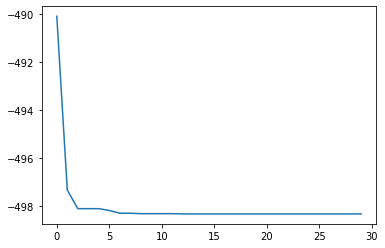

In [7]:
plt.plot(pso.gbest_y_hist)
plt.show()